Real data decomposition.  
Author: Javier Gamero Muñoz

# General Libraries

In [1]:
import os 
import sys 

# path to python main folder in this project
libraries = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) 
sys.path.append(libraries) 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from time import time

In [2]:
PATH = os.path.abspath(os.path.join(os.getcwd(), (os.pardir+'/')*3)) # main path
MODELS = os.path.join(PATH, os.path.join('scripts', os.path.join('python', 'models')))
print(PATH)
print(MODELS)

/Users/javigamero/MyMac/DS_Master/TFM
/Users/javigamero/MyMac/DS_Master/TFM/scripts/python/models


# Load data reduced

In [3]:
t_path = os.path.join(PATH, 'data_preproc/LightSignal_t.csv')
t = pd.read_csv(t_path, sep=';', header=None) # t[0] is nonsensen, remove it
t.set_index(0, inplace=True)

t = np.array(t).reshape(-1).astype(np.int32)
t.shape

(1000,)

In [4]:
t0 = 150 # (ns), moment to start considering the slow component, EXPERIMENTAL
t_idx = np.where(t>t0)[0]
t_idx.shape

(985,)

In [5]:
data_path = os.path.join(os.path.join(PATH, 'data_preproc'), 'DeconvolvedSignal_us.csv')
signals_dec_us = pd.read_csv(data_path, sep=';', header=None, index_col=0)

print(signals_dec_us.shape)
signals_dec_us.head()

(9325, 1000)


,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,,,,,,,,,,,,,,,,,,,,,
0_1,-0.013636,0.003455,5.652545,28.486182,44.607818,35.096364,21.015091,11.813455,7.580909,6.095455,...,-0.016545,-0.031273,-0.032909,-0.032000,-0.023455,-0.021091,-0.014000,-0.017818,-0.018545,-0.02250
0_4,0.000182,0.000727,1.786182,12.082909,23.939818,23.189455,14.626545,8.413455,5.297636,3.896545,...,0.001455,0.001273,0.002000,0.000182,-0.000909,-0.002182,-0.005818,-0.005273,-0.003818,-0.00250
0_6,0.004182,-0.002182,4.107455,18.174182,28.416909,23.247273,13.882909,7.938727,4.708000,3.035455,...,0.005455,0.005273,0.007091,0.008364,0.009091,0.010182,0.008909,0.006364,0.009455,0.00475
0_8,-0.008000,0.303091,5.657455,16.356182,20.395273,15.051636,8.831818,5.433091,3.595455,2.263455,...,-0.006182,-0.004909,-0.011818,-0.012000,-0.010727,-0.006727,-0.008727,-0.009818,-0.005818,-0.00800
0_9,0.007636,0.073455,3.116182,15.448909,23.388909,18.269273,11.052000,6.872364,4.603273,2.915636,...,0.000909,0.001091,0.001091,0.005091,0.006909,0.008727,0.006545,0.001273,0.006182,0.00525


In [6]:
def plotSignals(t, v, labels, xlabel='Time, t (ns)', ylabel='# photons', sep=False,
                figsize=(5,5)): 
    if len(v)!=len(labels): 
        print('Wrong number of labels')
        return
    
    # in separate plots
    if sep: 
        fig, axs = plt.subplots(1,len(v), figsize=figsize)
        for i in range(len(v)): 
            axs[i].plot(t, v[i], label=labels[i])
            axs[i].set_xlabel(xlabel)
            axs[i].set_ylabel(ylabel) 
            axs[i].legend(loc='best')
            
        plt.tight_layout()
        plt.show()

        return
    
    # all in one figure and plot
    else: 
        plt.figure(figsize=figsize)
        for i in range(len(v)): 
            plt.plot(t, v[i], label=labels[i], alpha=0.75)
            
        plt.xlabel(xlabel)
        plt.ylabel(ylabel) 
        plt.legend(loc='best')
        plt.show()
        
        return

In [26]:
np.random.seed(2023)
idx = np.random.randint(0,signals_dec_us.shape[0],3000)
X = np.array(signals_dec_us.iloc[idx,:].values)
X = X[:,:,np.newaxis].astype('float64')
print(t.shape)
print(X.shape)

(1000,)
(3000, 1000, 1)


# Decomposition

## Conversion: from ADC to #photons

In [33]:
from keras.saving import load_model
conv = load_model(os.path.join(MODELS, 'conversion_bidirLSTM.keras'))

X_conv = conv.predict(X)

94/94 [==============================] - 4s 44ms/step


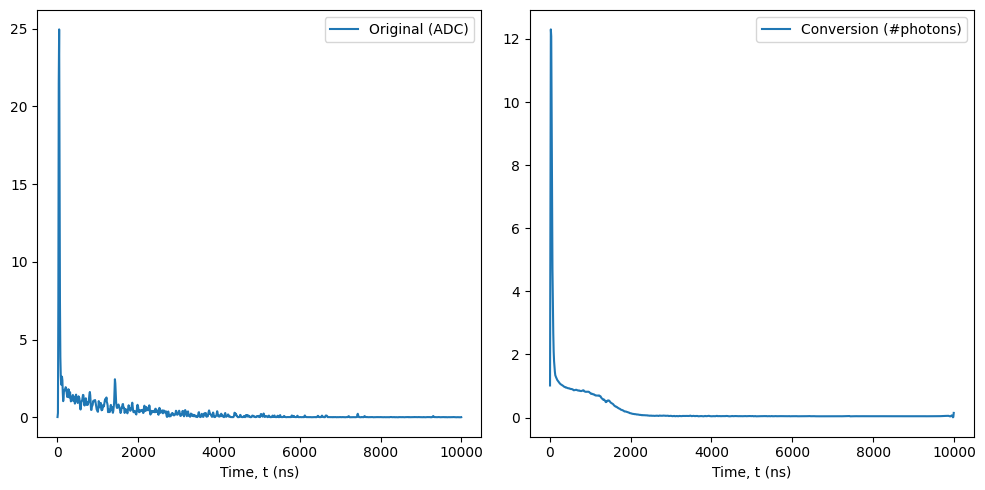

In [34]:
i = 4
v = [X[i,:,0], X_conv[i,:,0]]
plotSignals(t, v, ['Original (ADC)', 'Conversion (#photons)'], ylabel='', 
            sep=True, figsize=(10,5))